In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore/SampleSuperstore.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/kaggle/input/superstore/SampleSuperstore.csv")
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


<Axes: ylabel='Ship Mode'>

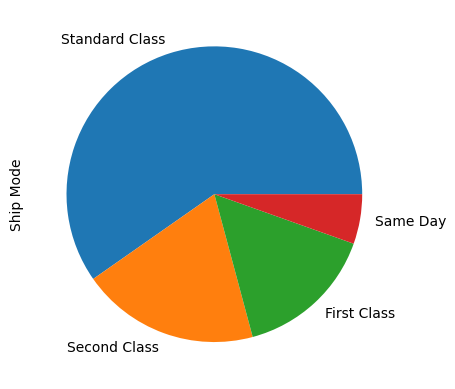

In [5]:
df['Ship Mode'].value_counts().plot(kind='pie')

<Axes: ylabel='Sub-Category'>

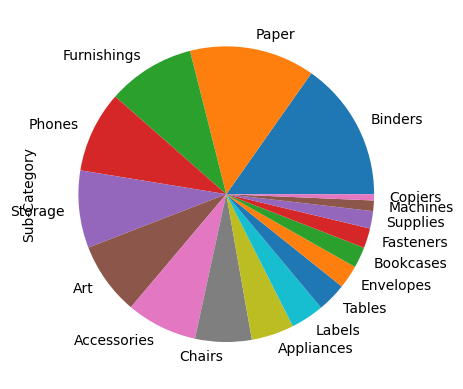

In [6]:
df['Sub-Category'].value_counts().plot(kind='pie')

<Axes: ylabel='Category'>

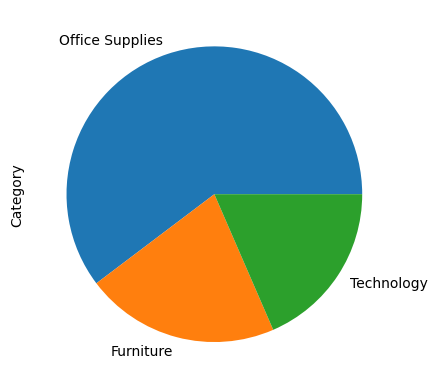

In [7]:
df['Category'].value_counts().plot(kind='pie')

<Axes: ylabel='Segment'>

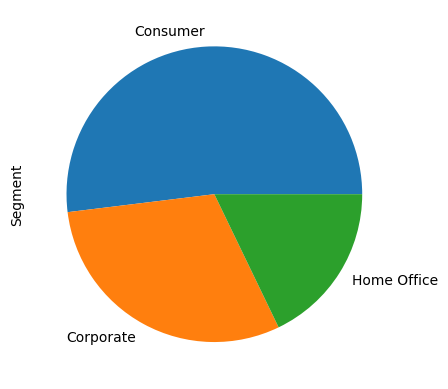

In [35]:
df['Segment'].value_counts().plot(kind='pie')

<Axes: >

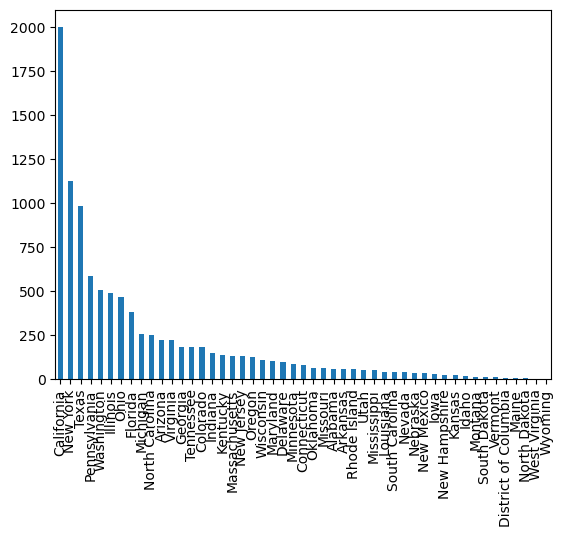

In [8]:
df['State'].value_counts().plot(kind='bar')

In [9]:
df.drop(columns="Postal Code",inplace=True)
df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [10]:
print(df['Ship Mode'].unique())
print(df['Segment'].unique())
print(df['Country'].unique())
print(df['Sub-Category'].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [11]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


<Axes: xlabel='Region'>

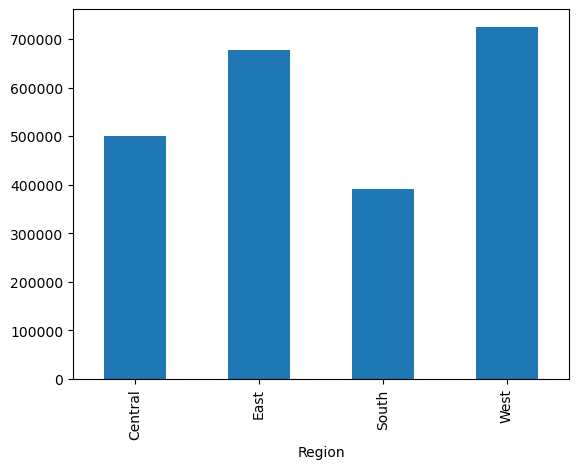

In [12]:
df.groupby('Region')['Sales'].sum().plot(kind='bar')

<Axes: ylabel='Sales'>

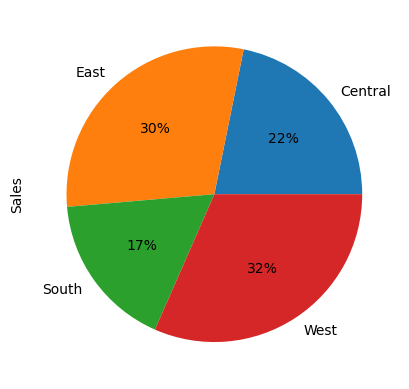

In [13]:
df.groupby('Region')['Sales'].sum().plot(kind='pie',autopct='%1.0f%%')

<Axes: ylabel='Profit'>

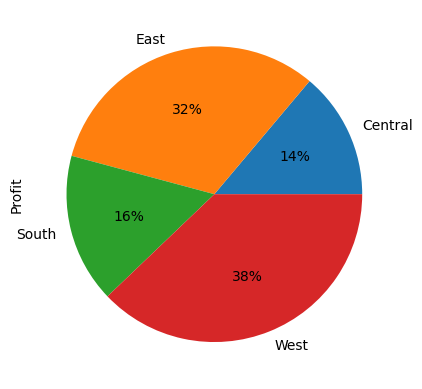

In [14]:
df.groupby('Region')['Profit'].sum().plot(kind='pie',autopct='%1.0f%%')

<Axes: xlabel='Segment'>

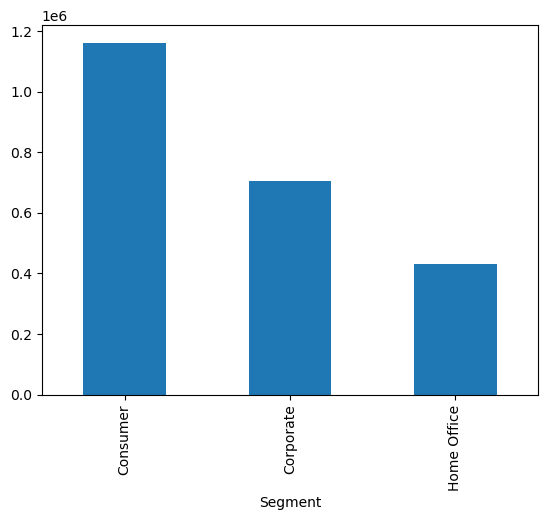

In [15]:
df.groupby('Segment')['Sales'].sum().plot(kind='bar')

<Axes: xlabel='Segment'>

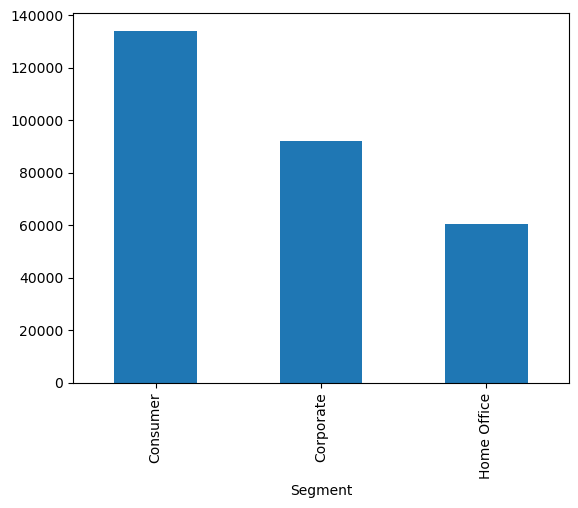

In [16]:
df.groupby('Segment')['Profit'].sum().plot(kind='bar')

<Axes: xlabel='Category'>

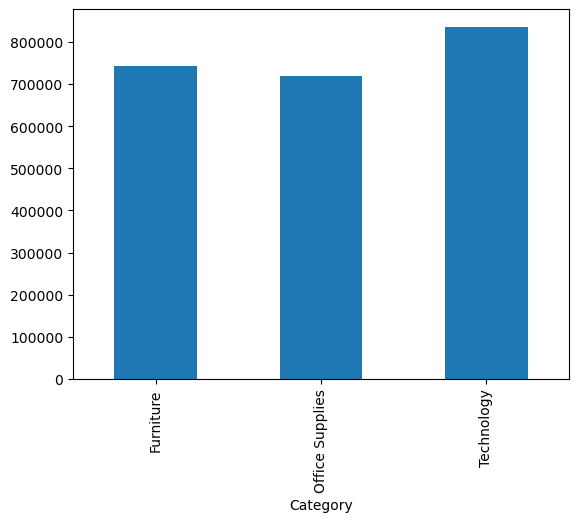

In [17]:
df.groupby('Category')['Sales'].sum().plot(kind='bar')

<Axes: xlabel='Category'>

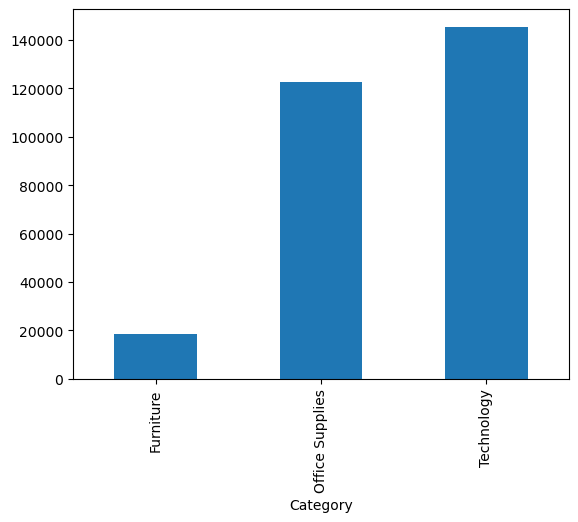

In [18]:
df.groupby('Category')['Profit'].sum().plot(kind='bar')

<Axes: ylabel='Sales'>

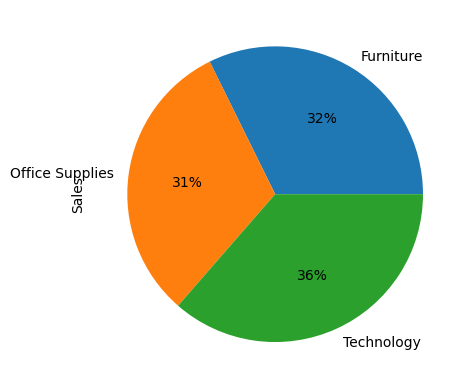

In [19]:
df.groupby('Category')['Sales'].sum().plot(kind='pie',autopct='%1.0f%%')

<Axes: ylabel='Profit'>

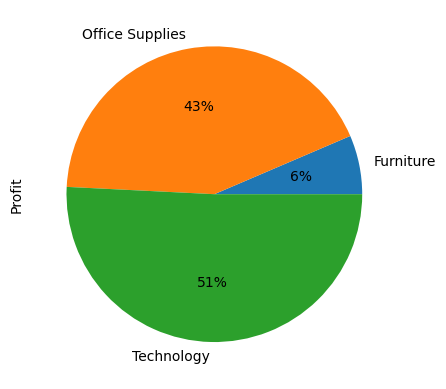

In [20]:
df.groupby('Category')['Profit'].sum().plot(kind='pie',autopct='%1.0f%%')

<Axes: xlabel='State'>

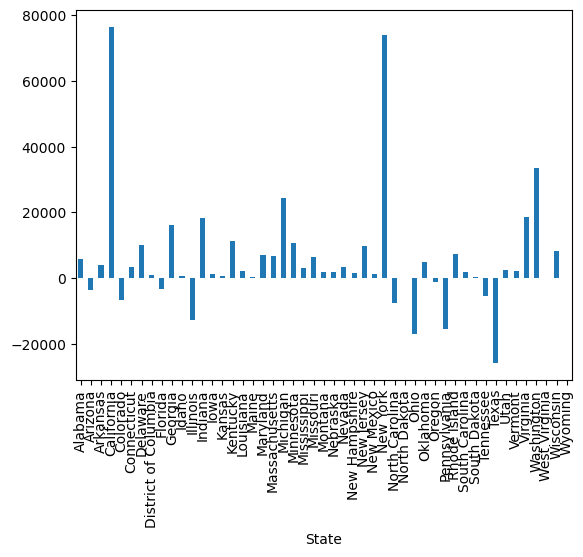

In [21]:
df.groupby('State')['Profit'].sum().plot(kind='bar')

<Axes: xlabel='State'>

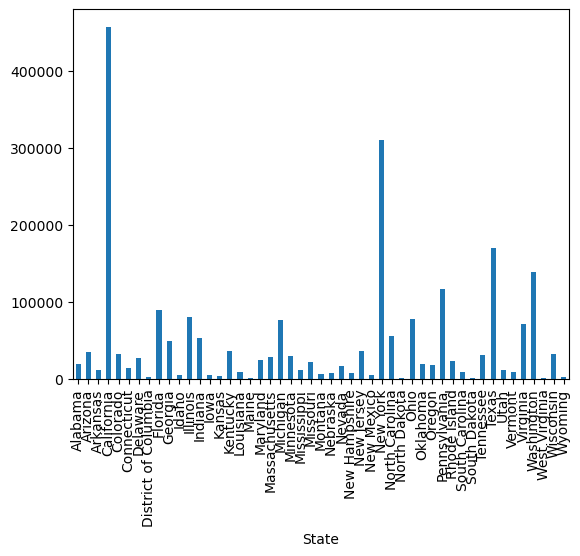

In [22]:
df.groupby('State')['Sales'].sum().plot(kind='bar')

<Axes: xlabel='Sales', ylabel='Density'>

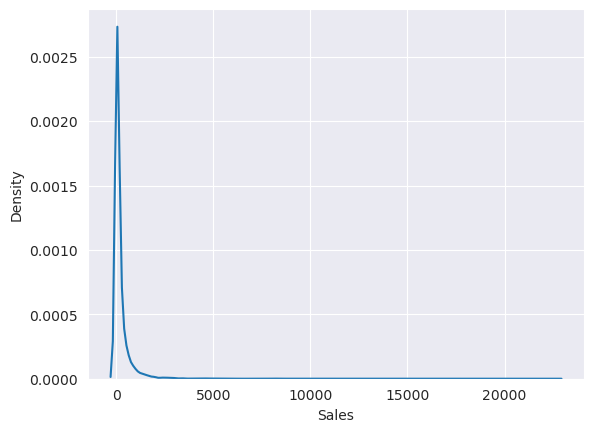

In [60]:
import seaborn as sns
sns.kdeplot(data=df['Sales'])#highly right skewd

<Axes: xlabel='Profit', ylabel='Density'>

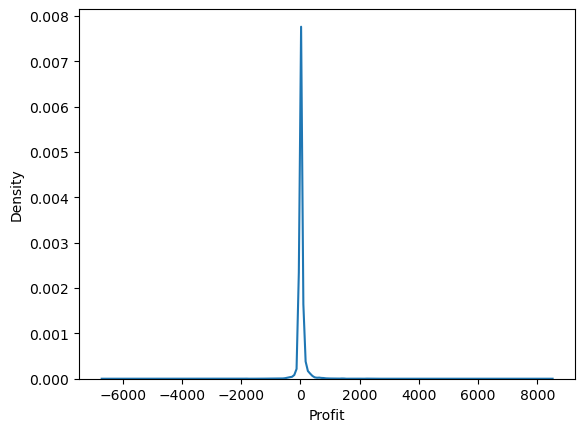

In [24]:
import seaborn as sns
sns.kdeplot(data=df['Profit'])#high peakedness

In [25]:
!pip install pandas_profiling
import pandas_profiling as pp
profile = pp.ProfileReport(df)
profile.to_file("anlaysis.html")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 43.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.1
    Uninstalling scipy-1.11.1:
      Successfully uninstalled scipy-1.11.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.10.1 which is incompatible.


/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/tmp/ipykernel_33/4201321167.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: xlabel='Discount', ylabel='Profit'>

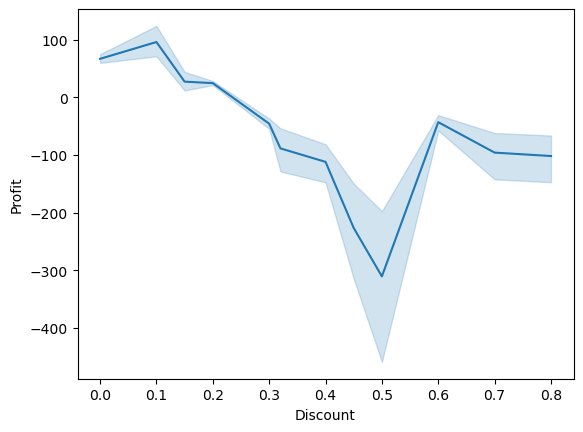

In [31]:
sns.lineplot(data=df,x='Discount',y='Profit')

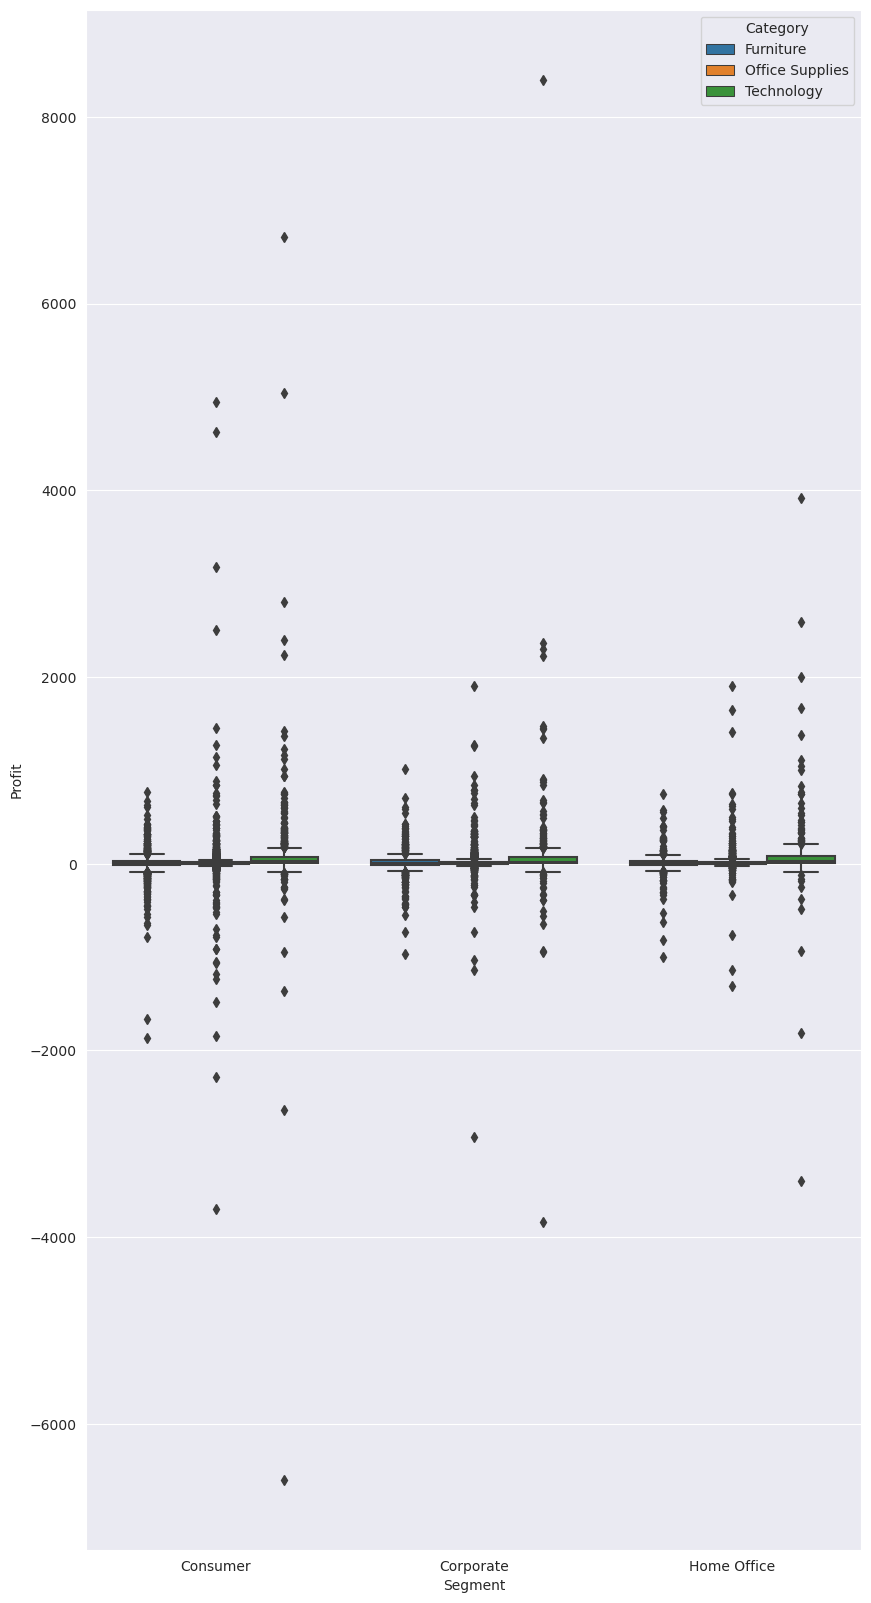

In [55]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 20))
sns.boxplot(x = 'Segment', y = 'Profit', data = df,hue="Category")
plt.show()

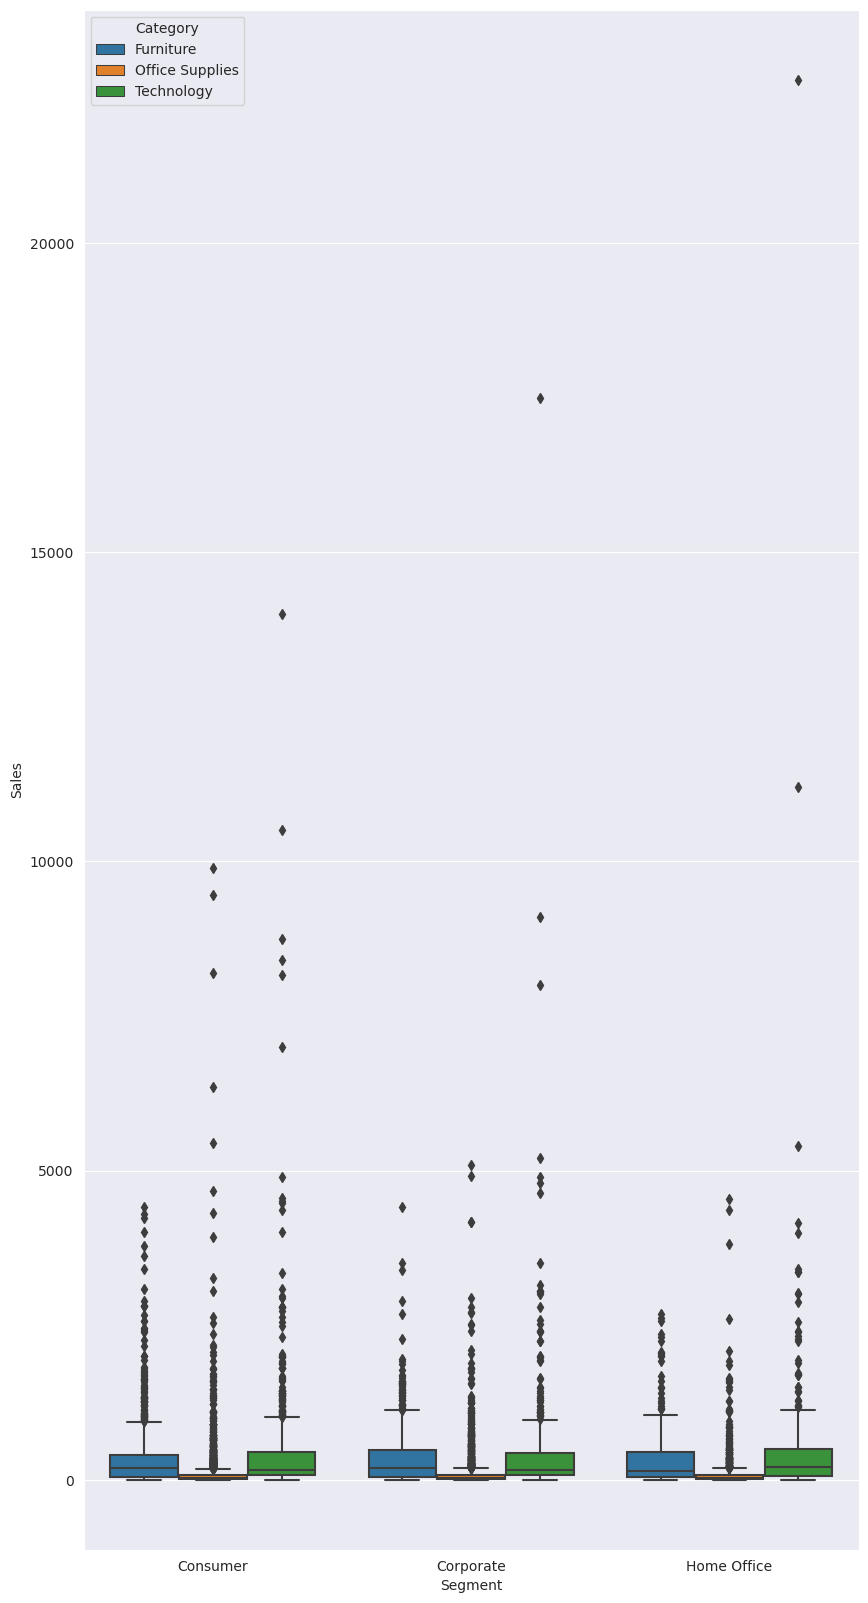

In [56]:
fig, ax = plt.subplots(figsize=(10, 20))
sns.boxplot(x = 'Segment', y = 'Sales', data = df,hue="Category")
plt.show()

<Axes: xlabel='Sales', ylabel='Profit'>

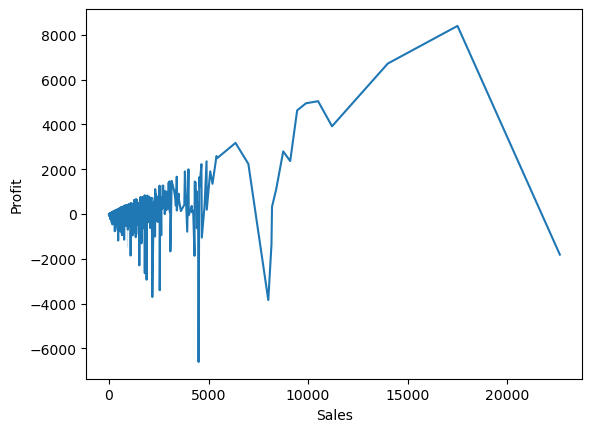

In [33]:
sns.lineplot(data=df,x='Sales',y='Profit')